In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [3]:
data = pd.read_csv('ex2data1.txt', header=None)

In [4]:
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
X = data.iloc[:,:-1]

In [6]:
y = data.iloc[:,2]

In [7]:
m = len(y)

In [8]:
mask = y == 1

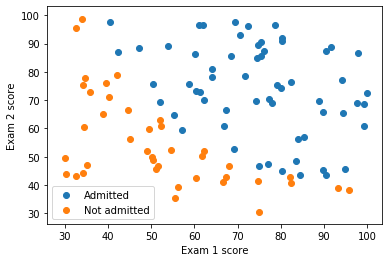

In [9]:
# Get values from features where y == 1
adm = plt.scatter(X[mask][0].values, X[mask][1].values)

# Get values from features where y == 0
not_adm = plt.scatter(X[~mask][0].values, X[~mask][1].values)

plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [10]:
(m, n) = X.shape

In [11]:
y = y[:, np.newaxis]

In [12]:
ones = np.ones((m, 1))

In [13]:
X = np.hstack((ones, X))

In [14]:
theta = np.zeros((n+1,1))

In [15]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [16]:
def costFunction(theta, X, y):
    temp = sigmoid(np.dot(X, theta))
    cost = ( - 1 / m) * np.sum(np.multiply(y, np.log(temp)) + np.multiply(1 - y, np.log(1 - temp)))
    return cost

In [17]:
costFunction(theta, X, y)

0.6931471805599453

In [18]:
def gradient(theta, X, y):
    temp = sigmoid(np.dot(X, theta)) - y
    temp = np.dot(X.T, temp)
    return (1 / m) * temp

In [19]:
temp = opt.fmin_tnc(func = costFunction, x0 = theta.flatten(),fprime = gradient, args = (X, y.flatten()))

In [20]:
theta_opt

NameError: name 'theta_opt' is not defined

In [21]:
plot_x = [np.min(X[:,1] - 2), np.max(X[:,2] + 2)]

In [22]:
plot_y = -(1 / theta_opt[2]) * (theta_opt[0] + np.dot(theta_opt[1], plot_x))

NameError: name 'theta_opt' is not defined

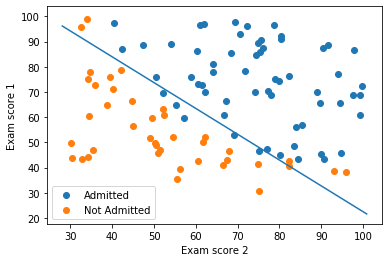

In [219]:
plt.plot(plot_x, plot_y)
plt.xlabel("Exam score 2")
plt.ylabel("Exam score 1")
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
plt.legend((adm, not_adm), ('Admitted', 'Not Admitted'))
plt.show()

In [220]:
def accuracy(X, y, theta_opt):
    pred = np.dot(X, theta_opt) >= 0
    percent = np.mean(pred == y)
    return percent * 100

In [222]:
print(accuracy(X, y.flatten(), theta_opt))

89.0
